# This notebook illustrates how to extract images and tables using `PyMuPDF`. It also converts the extracted tables into images, making them easier for the LLM to understand later.

In [ ]:
! pip install PyMuPDF pillow

In [ ]:
import fitz
from PIL import Image

In [ ]:
# path to sample pdf contains text, tables, and images.
pdf_file = "sample-doc.pdf"

In [ ]:
def extract_table_bboxes(page):
    bboxes = []
    tables = page.find_tables()
    for table in tables:
        bboxes.append(table.bbox)

    return bboxes

In [ ]:
def extract_images_bboxes(page):
    images = []
    page_images = page.get_images(full=True)
    for img_index, img in enumerate(page_images):
        images.append(page.get_image_bbox(img, True)[0])

    return images

In [ ]:
def crop_pdf_page(page, bounding_box):

    pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72), clip=bounding_box)

    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    return img

### The code below displays the tables and images on each page, with the following observations:

* Page 1, table 3 was not extracted correctly, ; it was split into two tables (3 and 4)
* Page 2, table 2 was not detected at all.




============================ Page #1 - Table #1 ============================



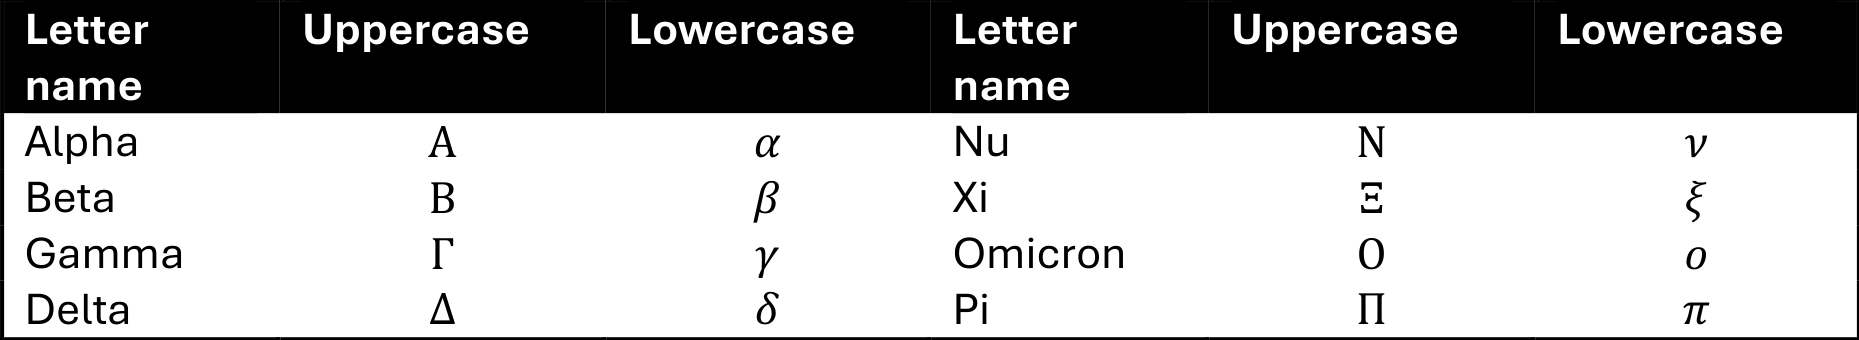


============================ Page #1 - Table #2 ============================



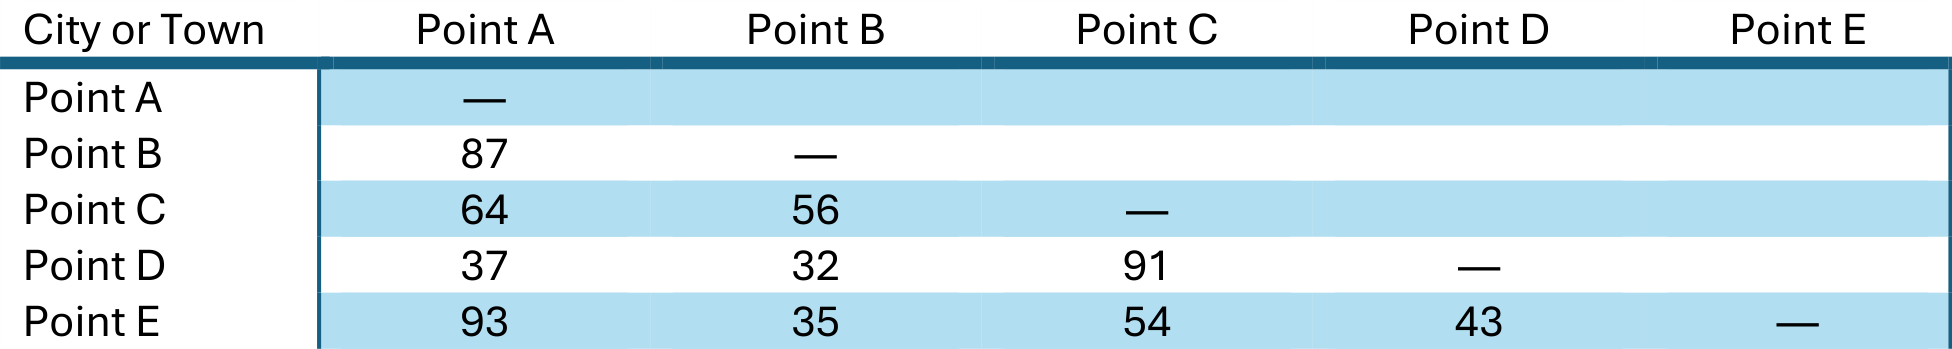


============================ Page #1 - Table #3 ============================



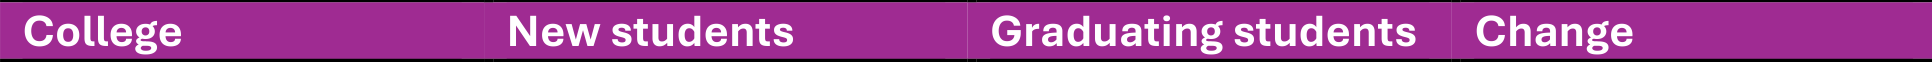


============================ Page #1 - Table #4 ============================



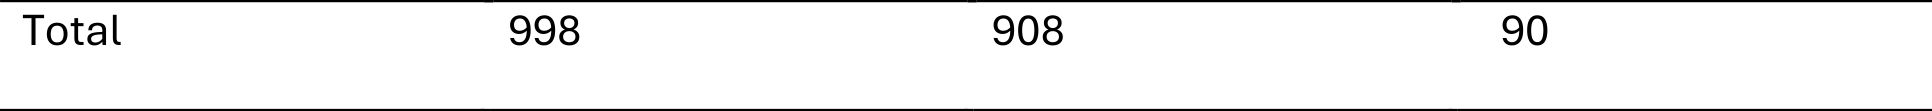






============================ Page #2 - Table #1 ============================



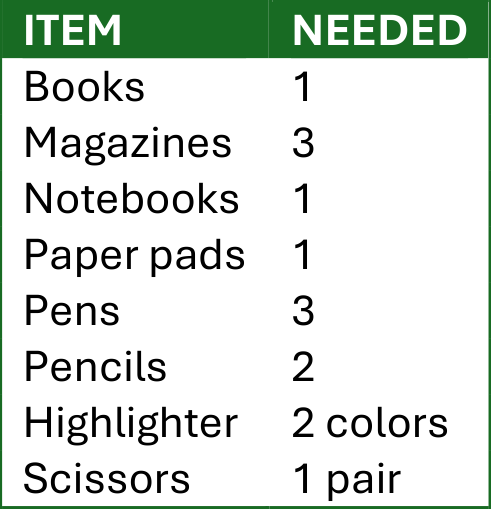







============================ Page #3 - Image #1 ============================



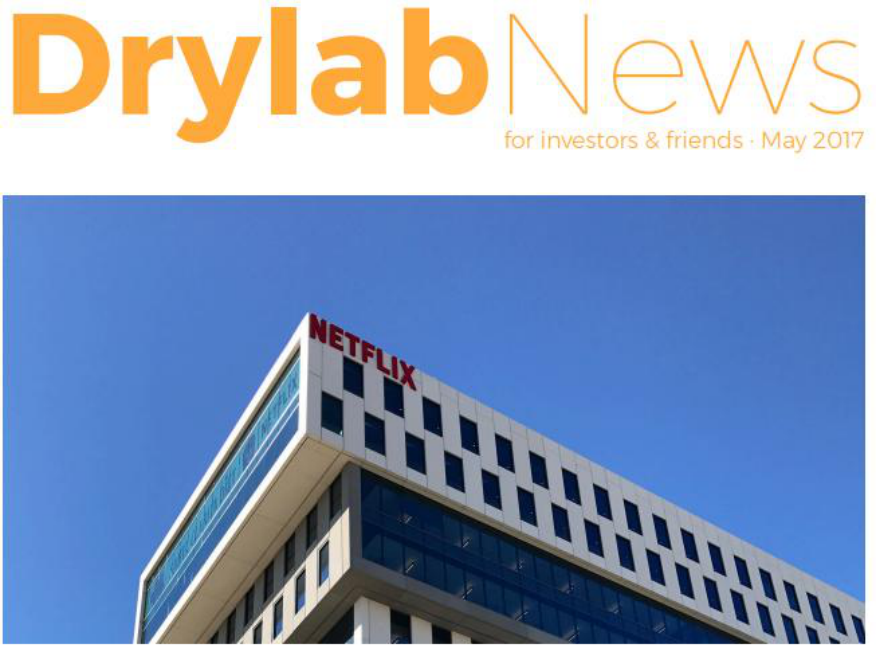


============================ Page #3 - Image #2 ============================



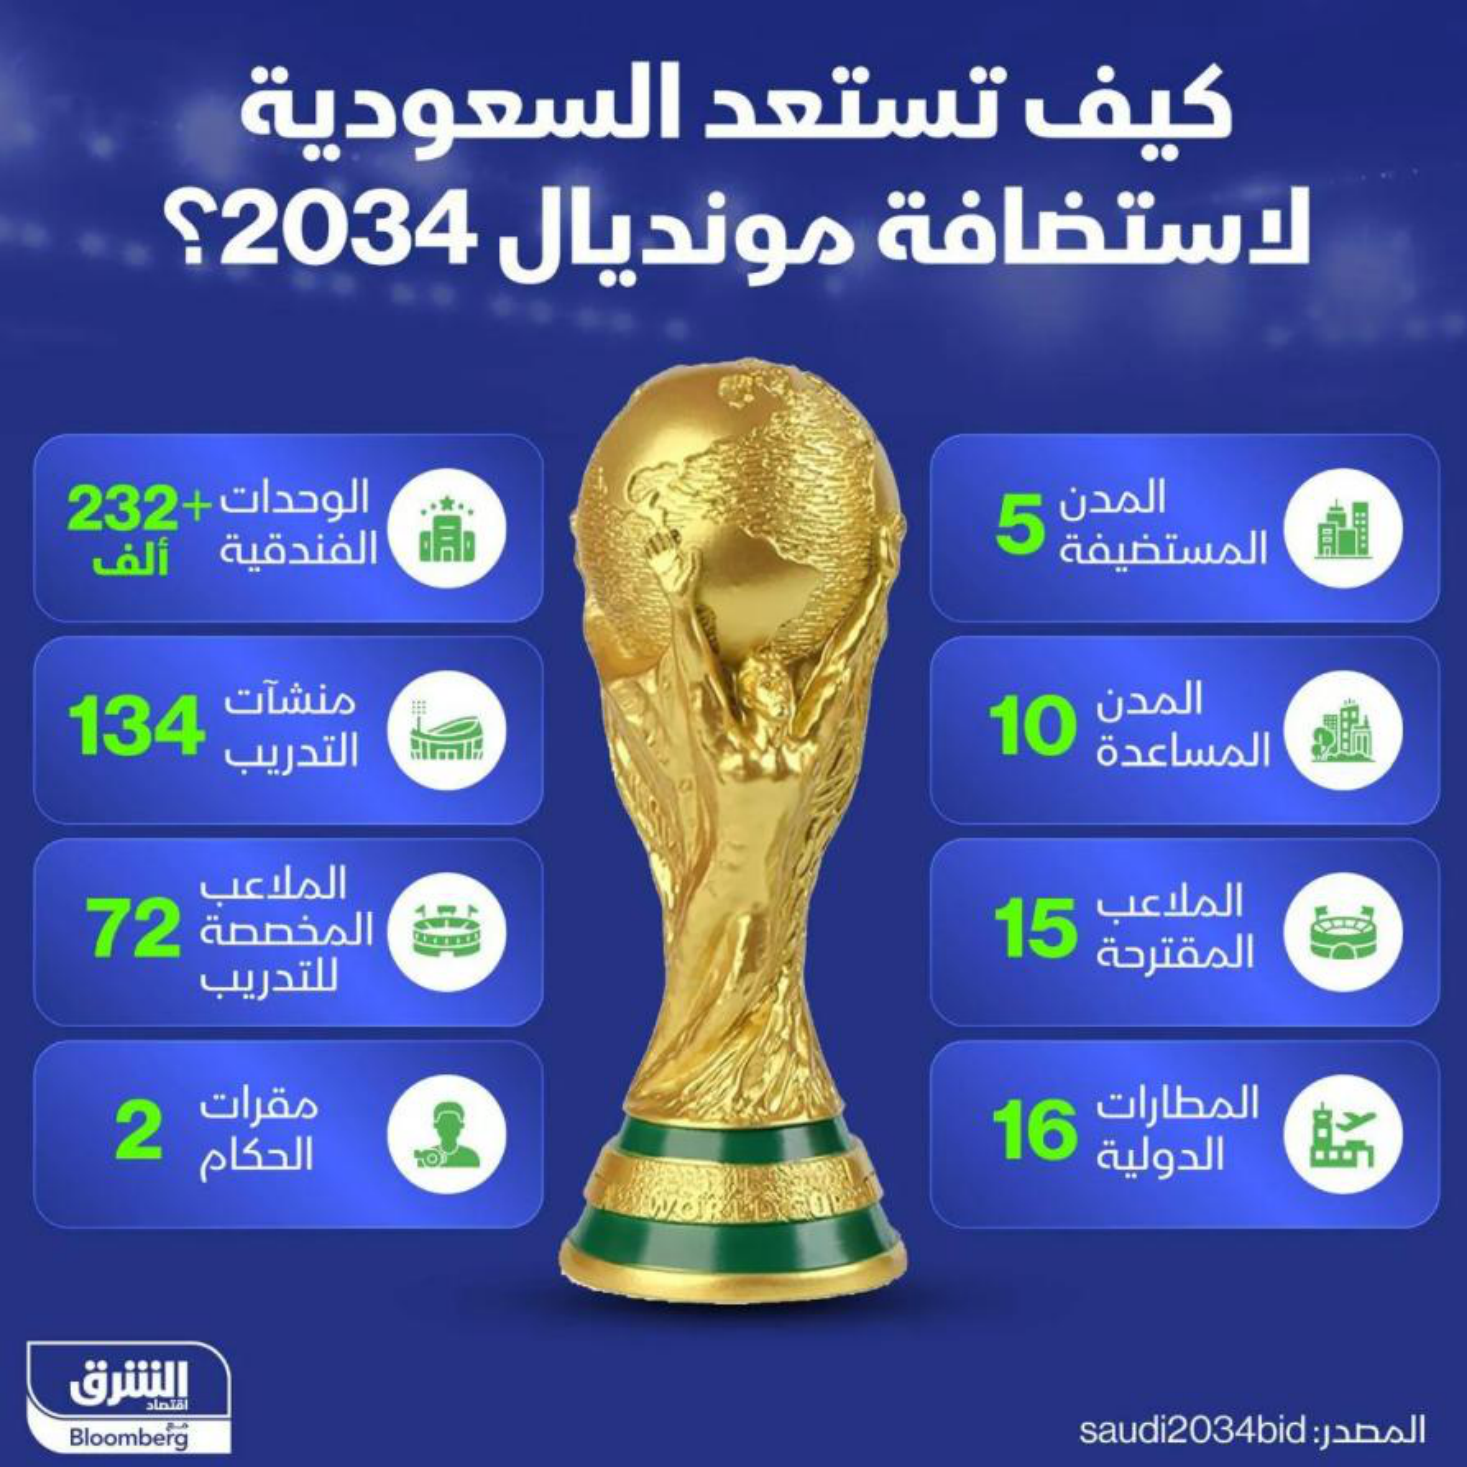

In [ ]:
doc = fitz.open(pdf_file)

for p, page in enumerate(doc):
    print()
    tables = []

    images = []

    table_bboxes = extract_table_bboxes(page)
    for table_bbox in table_bboxes:
        table = crop_pdf_page(page, table_bbox)
        tables.append(table)

    print()
    image_bboxes = extract_images_bboxes(page)
    for i, image_bbox in enumerate(image_bboxes):
        image = crop_pdf_page(page, image_bbox)
        images.append(image)

    print()
    for j, table in enumerate(tables):
      print(f"============================ Page #{(1+p)} - Table #{(1+j)} ============================")
      print()
      display(table)
      print()

    print()
    for i, image in enumerate(images):
      print(f"============================ Page #{(1+p)} - Image #{(1+i)} ============================")
      print()
      display(image)
      print()

doc.close()